In [1]:
import datetime
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

df= pd.read_csv('/Users/coconut/Backtest/data/BTCUSDT_futures_4h_from_20210101.csv', index_col=0, parse_dates=True)

In [2]:
df

,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
datetime,,,,,,,,,,,
2021-01-01 00:00:00,28948.19,29546.42,28706.00,29302.11,43210.161,2021-01-01 03:59:59.999,1.263866e+09,309298.0,21852.599,6.393282e+08,0
2021-01-01 04:00:00,29302.11,29422.32,28822.00,29107.71,26682.086,2021-01-01 07:59:59.999,7.776377e+08,200179.0,11772.871,3.432457e+08,0
2021-01-01 08:00:00,29107.72,29454.45,28900.00,29341.99,29562.630,2021-01-01 11:59:59.999,8.634511e+08,226389.0,14611.792,4.270177e+08,0
2021-01-01 12:00:00,29342.00,29668.86,29043.75,29210.84,49142.952,2021-01-01 15:59:59.999,1.443531e+09,324694.0,23957.859,7.040206e+08,0
2021-01-01 16:00:00,29210.85,29388.10,28627.12,29048.47,43668.170,2021-01-01 19:59:59.999,1.270056e+09,285496.0,20013.294,5.824092e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-17 04:00:00,83953.30,85043.40,83856.90,84629.00,20775.920,2025-04-17 07:59:59.999,1.756185e+09,342968.0,10905.011,9.217730e+08,0
2025-04-17 08:00:00,84629.00,84730.00,84144.10,84531.80,15124.909,2025-04-17 11:59:59.999,1.277223e+09,278468.0,7819.633,6.603718e+08,0
2025-04-17 12:00:00,84531.80,84829.40,83700.00,84495.50,36468.828,2025-04-17 15:59:59.999,3.075221e+09,620370.0,17692.067,1.492076e+09,0


In [3]:
import pandas as pd
import numpy as np

def pivothigh(close_series: pd.Series, left: int, right: int, distance: int) -> pd.Series:
    pivots = [np.nan] * len(close_series)

    for i in range(2*left, len(close_series)):
        window = close_series[i - 2*left:i]
        current = close_series[i-left]

        if current == window.max():
            if pivots[i-1] is not np.nan:
                if current > pivots[i-1]*(1 - distance/100):
                    pivots[i] = current
                else:
                    pivots[i] = pivots[i-1]
            else:
                pivots[i] = current
        else:
            pivots[i] = pivots[i-1] if i > 0 else np.nan

    for i in range(2*left):
        pivots[i] = np.nan
    
    return pd.Series(pivots, index=close_series.index)

def pivotlow(close_series: pd.Series, left: int, right: int, distance: int) -> pd.Series:
    pivots = [np.nan] * len(close_series)

    for i in range(2*left, len(close_series)):
        window = close_series[i - 2*left:i]
        current = close_series[i-left]

        if current == window.min():
            if pivots[i-1] is not np.nan:
                if current < pivots[i-1]*(1 + distance/100):
                    pivots[i] = current
                else:
                    pivots[i] = pivots[i-1]
            else:
                pivots[i] = current
        else:
            pivots[i] = pivots[i-1] if i > 0 else np.nan

    for i in range(2*left):
        pivots[i] = np.nan
    
    return pd.Series(pivots, index=close_series.index)

def add_pivot_high_change_column(df):
    df['pivot_high_change'] = 0

    for idx in range(1, len(df)):
        now = df.iloc[idx]['pivothigh']
        prev = df.iloc[idx-1]['pivothigh']

        if pd.notna(now) and (now != prev):
            df.loc[df.index[idx], 'pivot_high_change'] = 1
    return df

def add_pivot_low_change_column(df):
    df['pivot_low_change'] = 0

    for idx in range(1, len(df)):
        now = df.iloc[idx]['pivotlow']
        prev = df.iloc[idx-1]['pivotlow']

        if pd.notna(now) and (now != prev):
            df.loc[df.index[idx], 'pivot_low_change'] = 1
    return df

def add_rebreak_high(df):
    df['rebreak_high'] = 0

    in_break = False
    break_level = None
    dropped = False

    for idx in range(1, len(df)):
        now = df.iloc[idx]
        prev = df.iloc[idx - 1]

        if not in_break and prev['break_pivot_high'] == 0 and now['break_pivot_high'] == 1:
            in_break = True
            break_level = now['pivothigh']

        if in_break:
            
            if not dropped and now['Close'] < break_level:
                dropped = True
            
            if dropped and now['Close'] > break_level:
                df.loc[df.index[idx], 'rebreak_high'] = 1
                
                in_break = False
                dropped = False
                break_level = None

    return df

def add_rebreak_low(df):
    df['rebreak_low'] = 0

    in_break = False
    break_level = None
    dropped = False

    for idx in range(1, len(df)):
        now = df.iloc[idx]
        prev = df.iloc[idx - 1]

        if not in_break and prev['break_pivot_low'] == 0 and now['break_pivot_low'] == 1:
            in_break = True
            break_level = now['pivotlow']

        if in_break:
            if not dropped and now['Close'] > break_level:
                dropped = True

            if dropped and now['Close'] < break_level:
                df.loc[df.index[idx], 'rebreak_low'] = 1
                in_break = False
                dropped = False
                break_level = None

    return df

In [20]:
df['pivothigh'] = pivothigh(df['Close'], left=10, right=10, distance=18)
df['pivotlow'] = pivotlow(df['Close'], left=5, right=5, distance=18)
df['break_pivot_high'] = np.where(df['Close'] > df['pivothigh'], 1, 0)
df['break_pivot_low'] = np.where(df['Close'] < df['pivotlow'], 1, 0)
df = add_pivot_high_change_column(df)
df = add_pivot_low_change_column(df)
df = add_rebreak_high(df)
df = add_rebreak_low(df)

/var/folders/4g/c6vylbjj0gl07x_f6l921r980000gn/T/ipykernel_20863/1655679920.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/4g/c6vylbjj0gl07x_f6l921r980000gn/T/ipykernel_20863/1655679920.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:

fee_rate = 0.0005
initial_capital = 100000

def backtest_and_update_df(df):
    trades = []
    position = None
    entry_price = 0
    entry_time = None
    equity = initial_capital

    df['Equity'] = initial_capital

    for i in range(len(df)):
        row = df.iloc[i]

        if position is None and row['rebreak_high'] == 1:
            position = 'long'
            entry_price = row['Close']
            entry_time = row.name

        elif position is None and row['rebreak_low'] == 1:
            position = 'short'
            entry_price = row['Close']
            entry_time = row.name

        elif position == 'long':
            if row['pivot_high_change'] == 1 or row['break_pivot_low'] == 1:
                exit_price = row['Close']
                exit_time = row.name
                fee = (entry_price + exit_price) * fee_rate
                pnl = (exit_price - entry_price) - fee
                equity += pnl
                trades.append([entry_time, exit_time, entry_price, exit_price, fee, pnl])
                position = None

        elif position == 'short':
            if row['pivot_low_change'] == 1 or row['break_pivot_high'] == 1:
                exit_price = row['Close']
                exit_time = row.name
                fee = (entry_price + exit_price) * fee_rate
                pnl = (entry_price - exit_price) - fee
                equity += pnl
                trades.append([entry_time, exit_time, entry_price, exit_price, fee, pnl])
                position = None

        df.at[row.name, 'Equity'] = equity

    trades_df = pd.DataFrame(trades, columns=['Entry_Time', 'Exit_Time', 'Entry_Price', 'Exit_Price', 'Fee', 'PnL'])
    return trades_df, df

trades_df, updated_df = backtest_and_update_df(df)

trades_df.to_csv('trade_details.csv', index=False)
updated_df.to_csv('df_with_pivots.csv')

/var/folders/4g/c6vylbjj0gl07x_f6l921r980000gn/T/ipykernel_20863/2957562227.py:46: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102304.96077' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



                    Strategy
------------------  ----------
Start Period        2021-01-01
End Period          2025-04-17
Risk-Free Rate      0.0%
Time in Market      1.0%

Cumulative Return   35.89%
CAGR﹪              5.06%

Sharpe              0.37
Prob. Sharpe Ratio  99.98%
Sortino             1.47
Sortino/√2          1.04
Omega               3.79

Max Drawdown        -3.88%
Longest DD Days     399

Gain/Pain Ratio     2.79
Gain/Pain (1M)      5.82

Payoff Ratio        3.79
Profit Factor       3.79
Common Sense Ratio  -
CPC Index           7.19
Tail Ratio          -
Outlier Win Ratio   0.0
Outlier Loss Ratio  -0.0

MTD                 0.0%
3M                  0.0%
6M                  -0.26%
YTD                 0.0%
1Y                  0.04%
3Y (ann.)           5.88%
5Y (ann.)           5.06%
10Y (ann.)          5.06%
All-time (ann.)     5.06%

Avg. Drawdown       -1.51%
Avg. Drawdown Days  163
Recovery Factor     8.15
Ulcer Index         0.02
Serenity Index      0.88


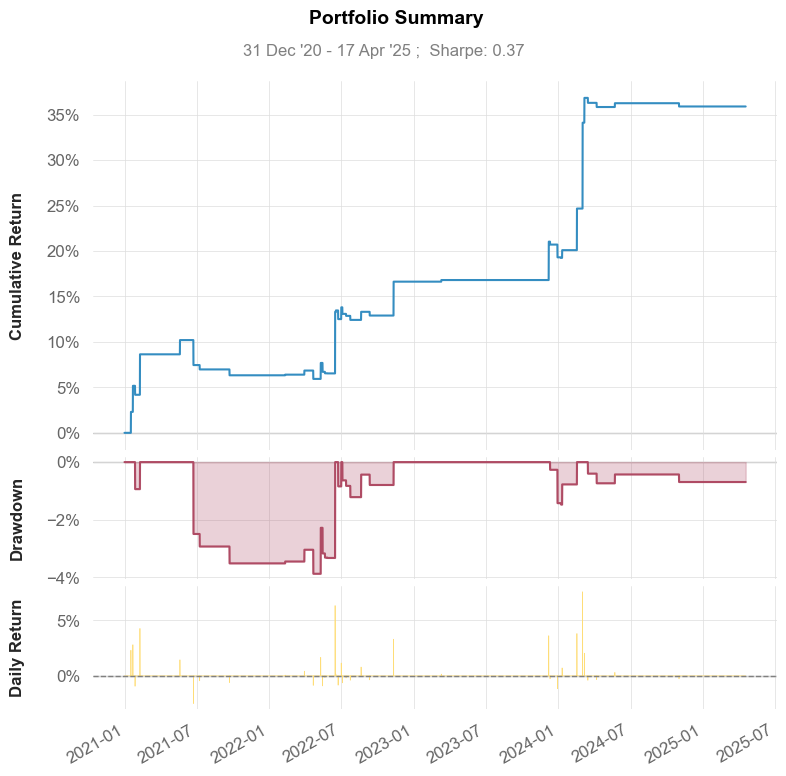

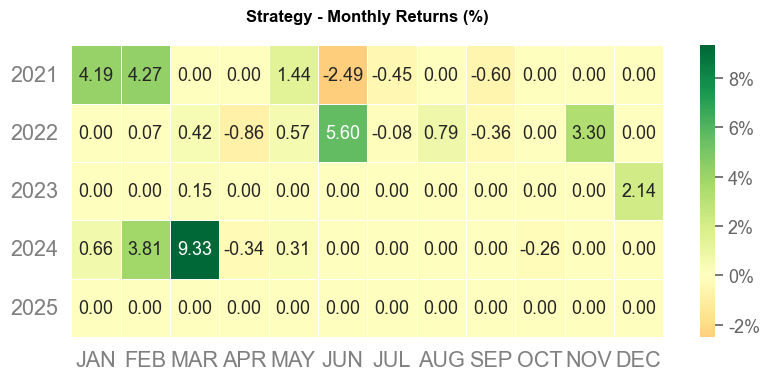

In [22]:
import quantstats as qs

updated_df['Equity'] = updated_df['Equity'].astype(float)
returns = updated_df['Equity'].pct_change().dropna()
qs.reports.basic(returns)

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column

output_notebook()

def plot_close_with_pivot_and_events(df, start_datetime, end_datetime):
    start_datetime = pd.to_datetime(start_datetime)
    end_datetime = pd.to_datetime(end_datetime)

    mask = (df.index >= start_datetime) & (df.index <= end_datetime)
    filtered_df = df.loc[mask].copy()

    if 'close_time' in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=['close_time'])

    filtered_df = filtered_df.reset_index().rename(columns={'index': 'datetime'})

    source = ColumnDataSource(filtered_df)

    p = figure(
        title=f"Close, Pivot High/Low, and Events ({start_datetime} ~ {end_datetime})",
        x_axis_type='datetime',
        x_axis_label='Datetime', y_axis_label='Price',
        outer_width=1200, outer_height=700,
        tools="pan,wheel_zoom,box_zoom,reset,save"
    )

    p.line('datetime', 'Close', source=source, line_width=2, color='black', legend_label="Close")

    p.line('datetime', 'pivothigh', source=source, line_width=2, color='red', legend_label="Pivot High", line_dash="dashed")
    p.line('datetime', 'pivotlow', source=source, line_width=2, color='blue', legend_label="Pivot Low", line_dash="dashed")

    event_mapping = {
        #'break_pivot_high': ('green', 'square'),
        #'break_pivot_low': ('red', 'square'),
        'pivot_high_change': ('green', 'inverted_triangle'),
        'pivot_low_change': ('red', 'inverted_triangle'),
        'rebreak_high': ('green', 'triangle'),
        'rebreak_low': ('red', 'triangle')
    }

    for event, (color, marker) in event_mapping.items():
        event_df = filtered_df[filtered_df[event] == 1]
        if not event_df.empty:
            p.scatter(event_df['datetime'], event_df['Close'],
                      size=10, marker=marker, color=color,
                      legend_label=event)

    # Hover
    p.add_tools(HoverTool(tooltips=[
        ("Datetime", "@datetime{%F %T}"),
        ("Close", "@Close"),
        ("Pivot High", "@pivothigh"),
        ("Pivot Low", "@pivotlow"),
    ], formatters={'@datetime': 'datetime'}))

    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    show(p)

plot_close_with_pivot_and_events(df, '2021-05-20 00:00:00', '2021-06-21 23:59:59')

Loading BokehJS ...

In [15]:
import optuna

def objective(trial):
    
    highBars = trial.suggest_int('highBars', 5, 30)
    lowBars = trial.suggest_int('lowBars', 3, 20)
    distance = trial.suggest_int('distance', 10, 30)

    df= pd.read_csv('/Users/coconut/Backtest/data/BTCUSDT_futures_4h_from_20210101.csv', index_col=0, parse_dates=True)
    df['pivothigh'] = pivothigh(df['Close'], left=highBars, right=highBars, distance=distance)
    df['pivotlow'] = pivotlow(df['Close'], left=lowBars, right=lowBars, distance=distance)
    df['break_pivot_high'] = np.where(df['Close'] > df['pivothigh'], 1, 0)
    df['break_pivot_low'] = np.where(df['Close'] < df['pivotlow'], 1, 0)
    df = add_pivot_high_change_column(df)
    df = add_pivot_low_change_column(df)
    df = add_rebreak_high(df)
    df = add_rebreak_low(df)

    trades_df, updated_df = backtest_and_update_df(df)
    updated_df['Equity'] = updated_df['Equity'].astype(float)
    returns = updated_df['Equity'].pct_change().dropna()
    sharpe_ratio = qs.stats.sharpe(returns)

    return sharpe_ratio

In [16]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2025-04-20 13:31:47,611] A new study created in memory with name: no-name-de53fff2-dbb5-4768-b3a8-32e91a0a7d05
/var/folders/4g/c6vylbjj0gl07x_f6l921r980000gn/T/ipykernel_20863/1655679920.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/4g/c6vylbjj0gl07x_f6l921r980000gn/T/ipykernel_20863/1655679920.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/4g/c6vylbjj0gl07x_f6l921r980000gn/T/ipykernel_20863/2957562227.py:46: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '101356.757325' has dtype incompatible wi

In [18]:
optuna.visualization.plot_optimization_history(study).show()
optuna.visualization.plot_param_importances(study).show()
optuna.visualization.plot_contour(study).show()
optuna.visualization.plot_parallel_coordinate(study).show()


In [19]:
print(study.best_trial)

FrozenTrial(number=64, state=1, values=[0.37372603630077583], datetime_start=datetime.datetime(2025, 4, 20, 13, 33, 48, 309091), datetime_complete=datetime.datetime(2025, 4, 20, 13, 33, 50, 168359), params={'highBars': 10, 'lowBars': 5, 'distance': 18}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'highBars': IntDistribution(high=30, log=False, low=5, step=1), 'lowBars': IntDistribution(high=20, log=False, low=3, step=1), 'distance': IntDistribution(high=30, log=False, low=10, step=1)}, trial_id=64, value=None)
